<h1>기본 설정</h1>

In [58]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df=sns.load_dataset("titanic")

<h1>타이타닉자료의데이터크기, 자료형태를구하라</h1>

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<h1>각변수별로결측치와고유값의개수를구하라</h1>

<h2>결측치

In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<h2>고유값

In [3]:
df.value_counts()

survived  pclass  sex     age   sibsp  parch  fare      embarked  class  who    adult_male  deck  embark_town  alive  alone
1         1       female  24.0  0      0      69.3000   C         First  woman  False       B     Cherbourg    yes    True     2
                          58.0  0      0      26.5500   S         First  woman  False       C     Southampton  yes    True     1
                          49.0  0      0      25.9292   S         First  woman  False       D     Southampton  yes    True     1
                                1      0      76.7292   C         First  woman  False       D     Cherbourg    yes    False    1
                          50.0  0      1      247.5208  C         First  woman  False       B     Cherbourg    yes    False    1
                                                                                                                              ..
                          16.0  0      0      86.5000   S         First  woman  False       B     Sout

<h1>생존자(survived == 1)와사망자(survived == 0)수는각각몇명인가?

In [8]:
survived=df['survived']
survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

<h1>타이타닉자료의기초통계량을구하라

In [9]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h1>남녀성별의비중을구하고생존여부(survived)와의상관관계를구하라

<h1>남녀의 비중

In [38]:
df['sex'].value_counts(normalize=True)*100

male      64.758698
female    35.241302
Name: sex, dtype: float64

<h1>상관계수

In [48]:
df['sexnum']=df['sex'].apply(lambda x : 1 if x=="male" else 0)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sexnum
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,1
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1


In [53]:
float(df.corr()['sexnum'][0])

C:\Users\user\AppData\Local\Temp\ipykernel_3624\2657650491.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  float(df.corr()['sexnum'][0])


-0.543351380657755

<h1>승선등급(pclass), 나이, 동반자녀수와생존여부(survived)와의상관관계를구하라

In [56]:
df[['pclass','age','alone','survived']].corr()

,pclass,age,alone,survived
pclass,1.000000,-0.369226,0.135207,-0.338481
age,-0.369226,1.000000,0.198270,-0.077221
alone,0.135207,0.198270,1.000000,-0.203367
survived,-0.338481,-0.077221,-0.203367,1.000000


<h1>승선요금(fare)과나이와의산점도(scatter)를시각화하

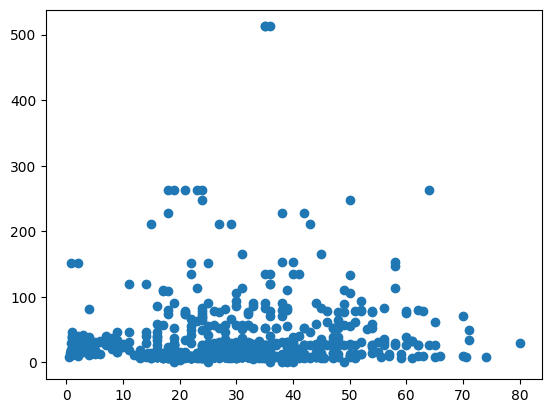

In [59]:
plt.scatter(x=df['age'],y=df['fare'])

<h1>승선요금(fare)과연령의Histogram을시각화하라

array([[<Axes: title={'center': 'fare'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

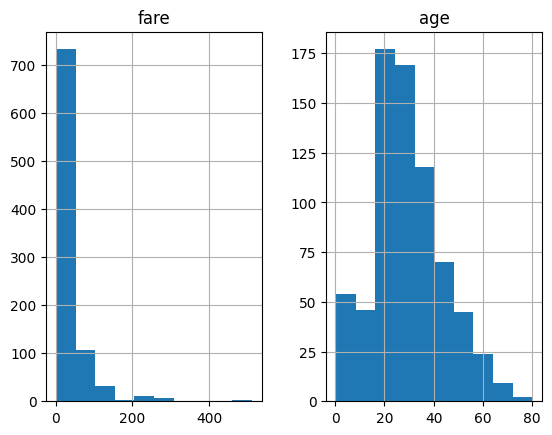

In [60]:
df[['fare','age']].hist()